### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import pandas as pd

In [3]:
pd.read_csv("./data/gemstone.csv")

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [4]:
df = pd.read_csv("./data/gemstone.csv")

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
df.isnull().sum()         # No missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df.duplicated().sum()        # No duplicate rows

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [13]:
# Let's drop id column 

df = df.drop(labels=["id"], axis=1)

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [17]:
# Numerical and categorical columns

numerical_columns = df.columns[df.dtypes!= "object"]
categorical_columns = df.columns[df.dtypes== "object"]
print("Numerical columns : ", numerical_columns)
print("Categorical columns : ", categorical_columns)

Numerical columns :  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns :  Index(['cut', 'color', 'clarity'], dtype='object')


In [18]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [19]:
# Categorical features

In [20]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [21]:
df["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [24]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [22]:
df["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [25]:
df["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

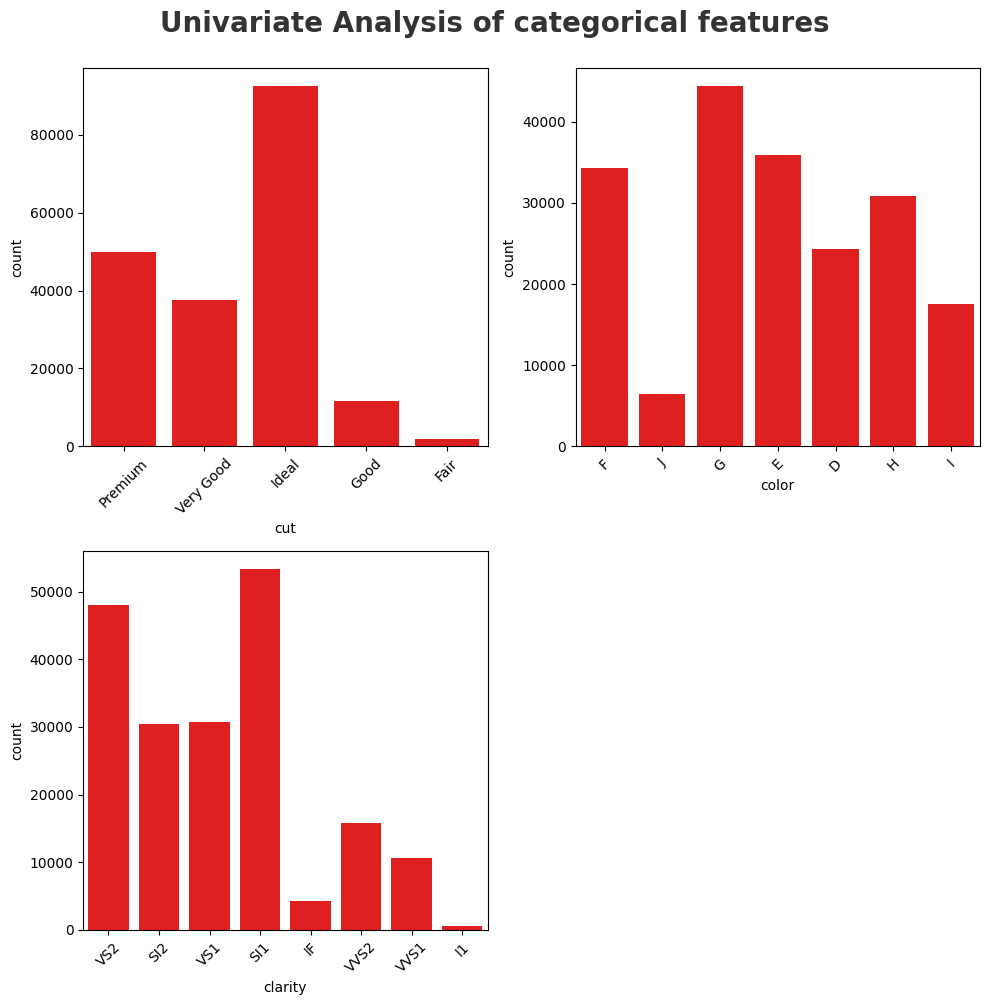

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.suptitle("Univariate Analysis of categorical features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(len(categorical_columns)):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df, x=categorical_columns[i], color="r")
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

C:\Users\manoh\AppData\Local\Temp\ipykernel_12984\647098584.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=numerical_columns[i], color="r", shade = True)
C:\Users\manoh\AppData\Local\Temp\ipykernel_12984\647098584.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=numerical_columns[i], color="r", shade = True)
C:\Users\manoh\AppData\Local\Temp\ipykernel_12984\647098584.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=numerical_columns[i], color="r", shade = True)
C:\Users\manoh\AppData\Local\Temp\ipykernel_12984\647098584.py:6: FutureWarning: 

`shade` is now deprecated in favor 

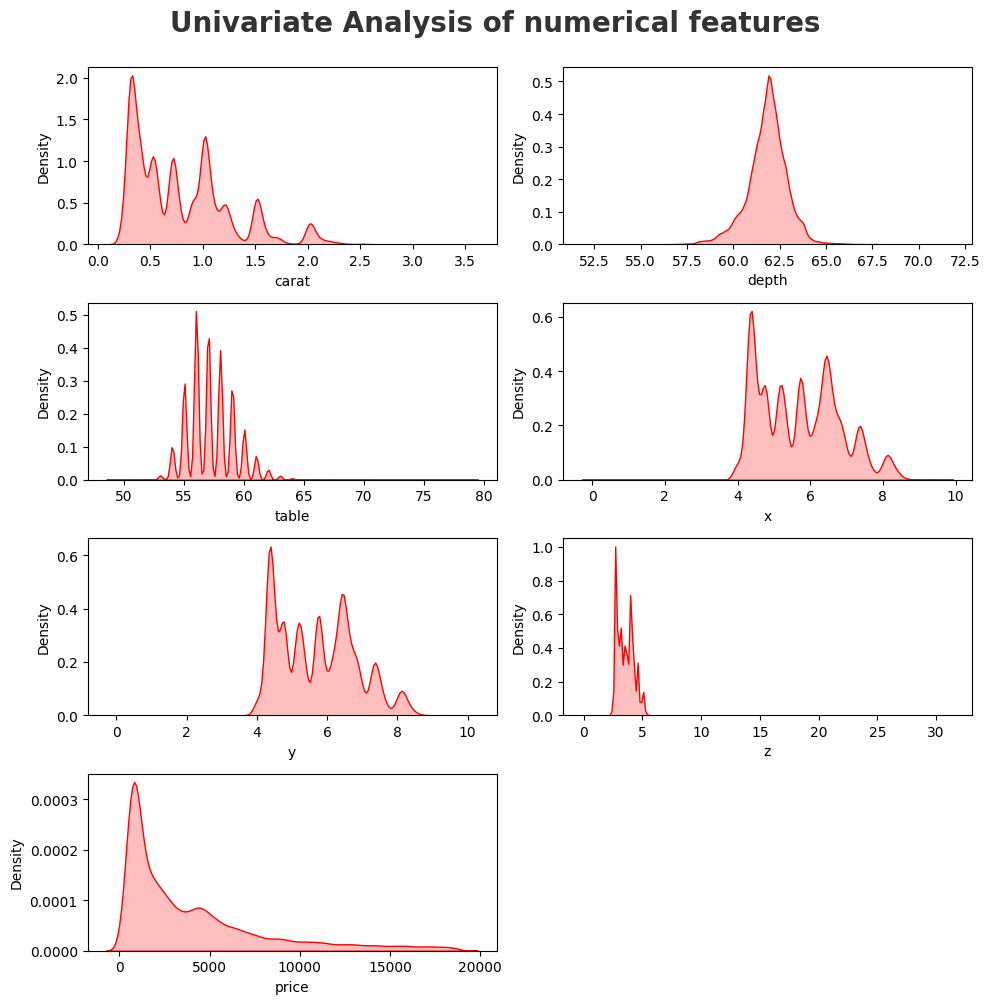

In [31]:
plt.figure(figsize=(10, 10))
plt.suptitle("Univariate Analysis of numerical features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(len(numerical_columns)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df, x=numerical_columns[i], color="r", shade = True)
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

In [32]:
df.corr(numeric_only=True)

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

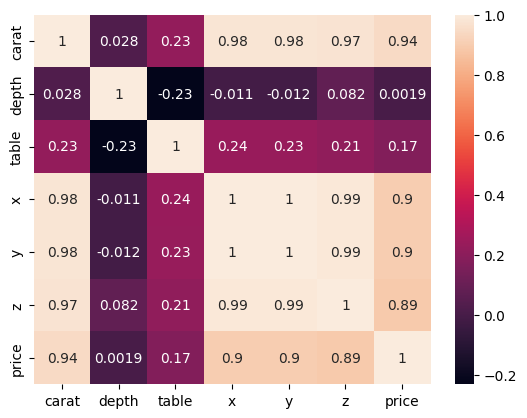

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

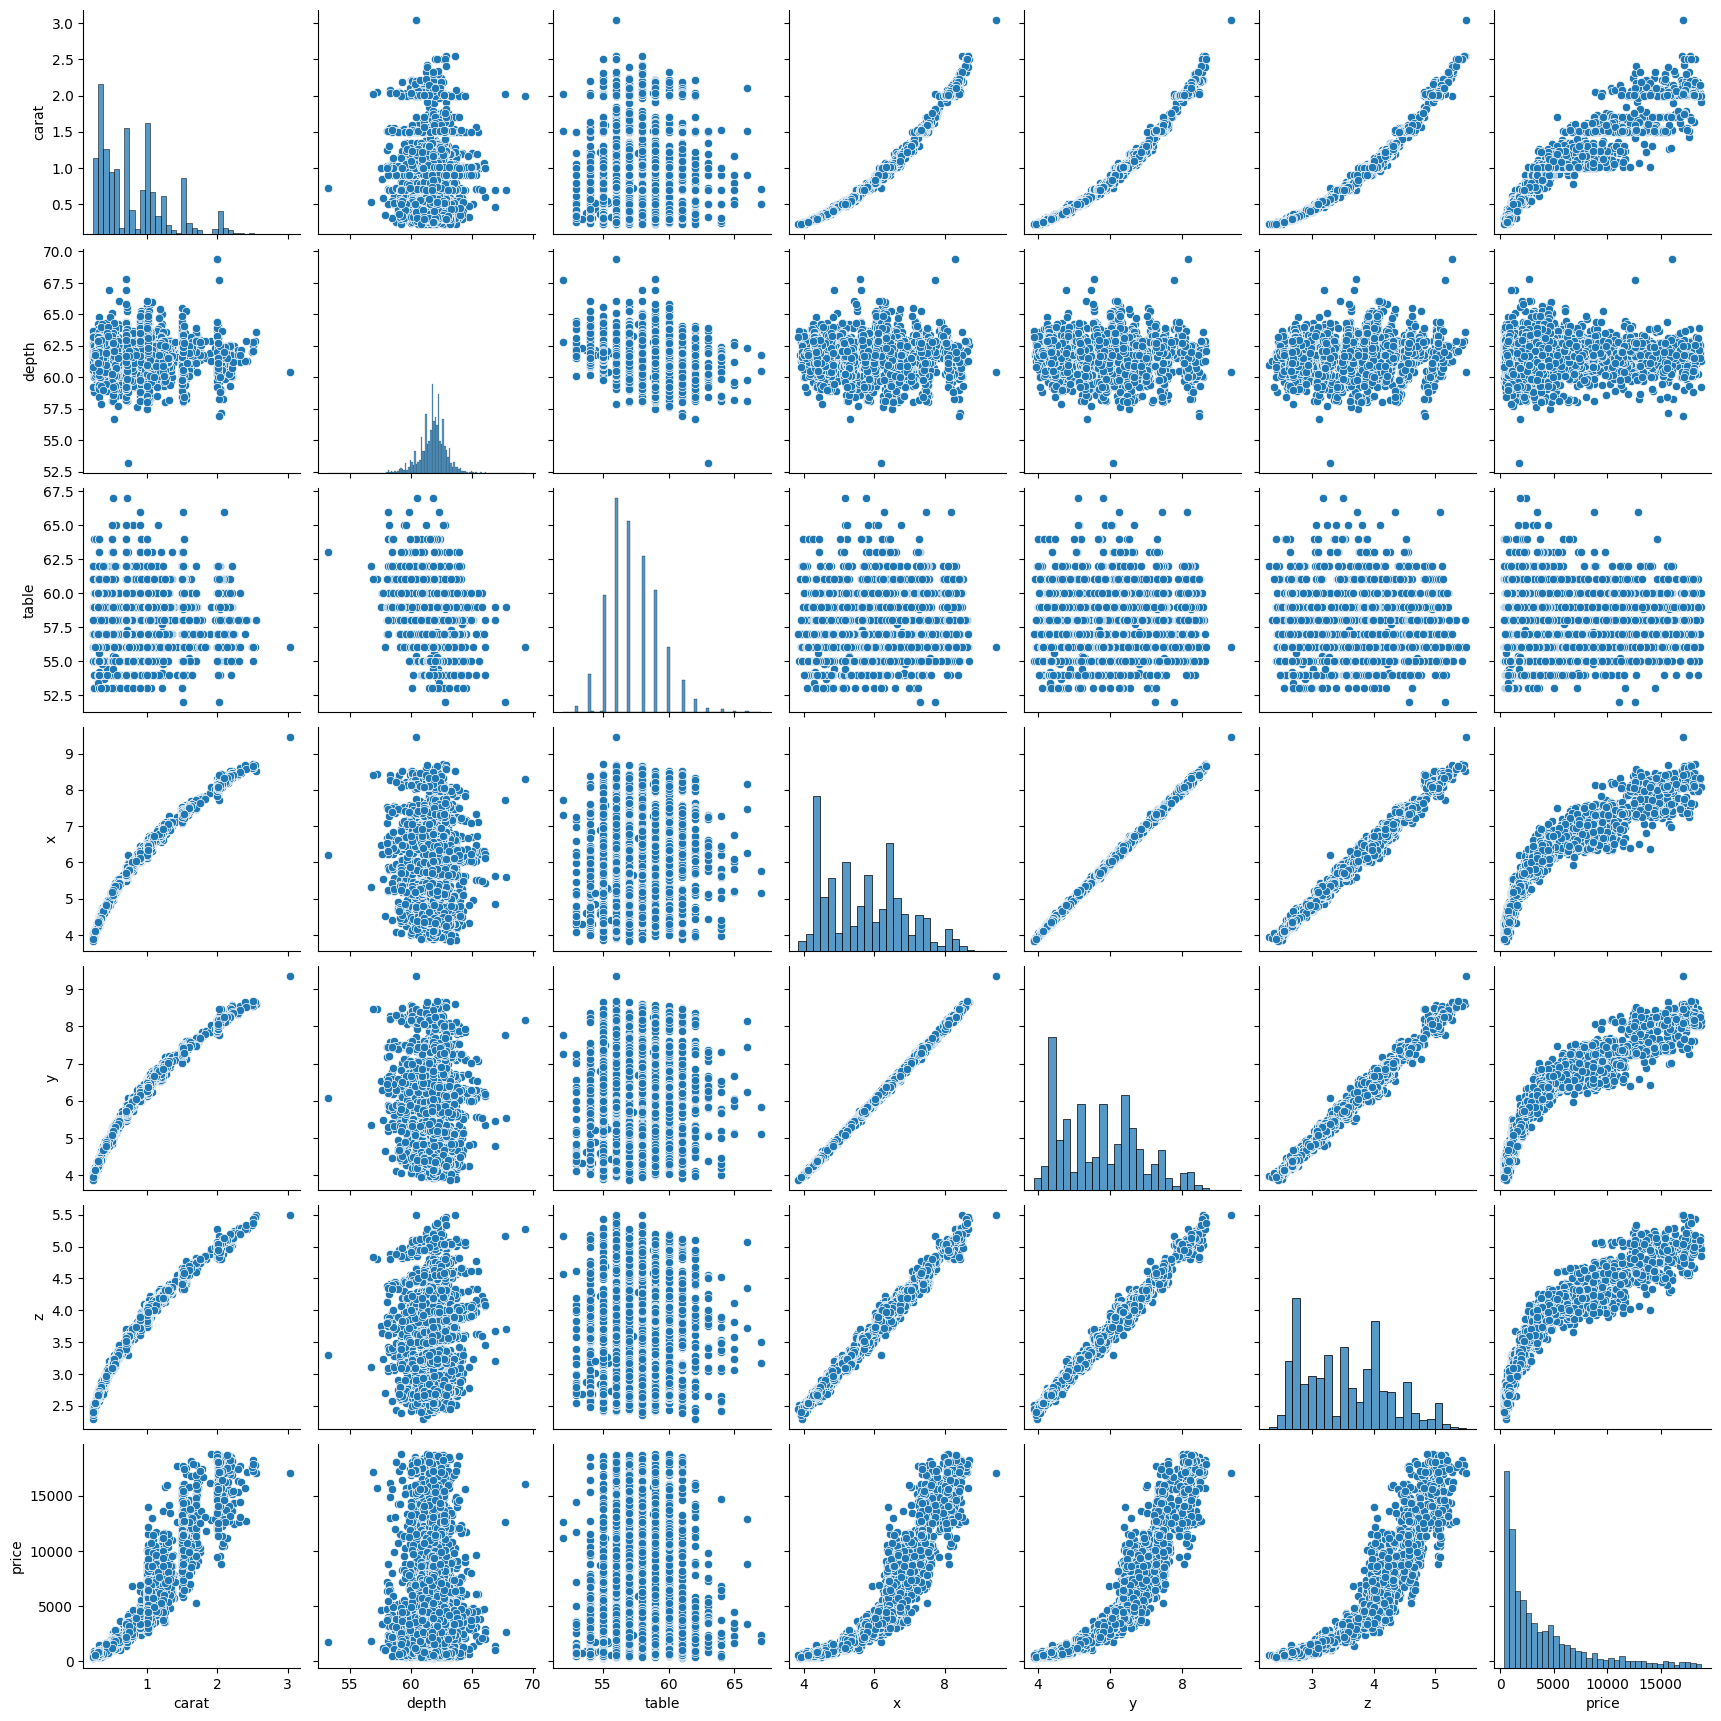

In [34]:
sns.pairplot(df.sample(n=5000))

In [35]:
# All categorical features are ordinal here

cut_map = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
clarity_map = {"I1" : 1, "SI2" : 2, "SI1" : 3, "VS2" : 4, "VS1" : 5, "VVS2" : 6, "VVS1" : 7, "IF" : 8}
color_map = {"J" : 1, "I" : 2, "H" : 3, "G" : 4, "F" : 5, "E" : 6, "D" : 7}

In [36]:
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].replace(color_map)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
